In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SVC for classification through support vector machine
from sklearn.svm import SVC

# importing train test split & GridSearchCV library
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# standardization library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# pipelline libraray
from sklearn.pipeline import Pipeline

# figure parameters
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 200

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SalaryData_Train.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
df.describe(include = object)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
count,30161,30161,30161,30161,30161,30161,30161,30161,30161
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22285,9840,14065,4038,12463,25932,20380,27504,22653


In [6]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [8]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [9]:
df['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [10]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [11]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [12]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [13]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [14]:
df['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [15]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

Text(0.5, 1.0, 'boxplot')

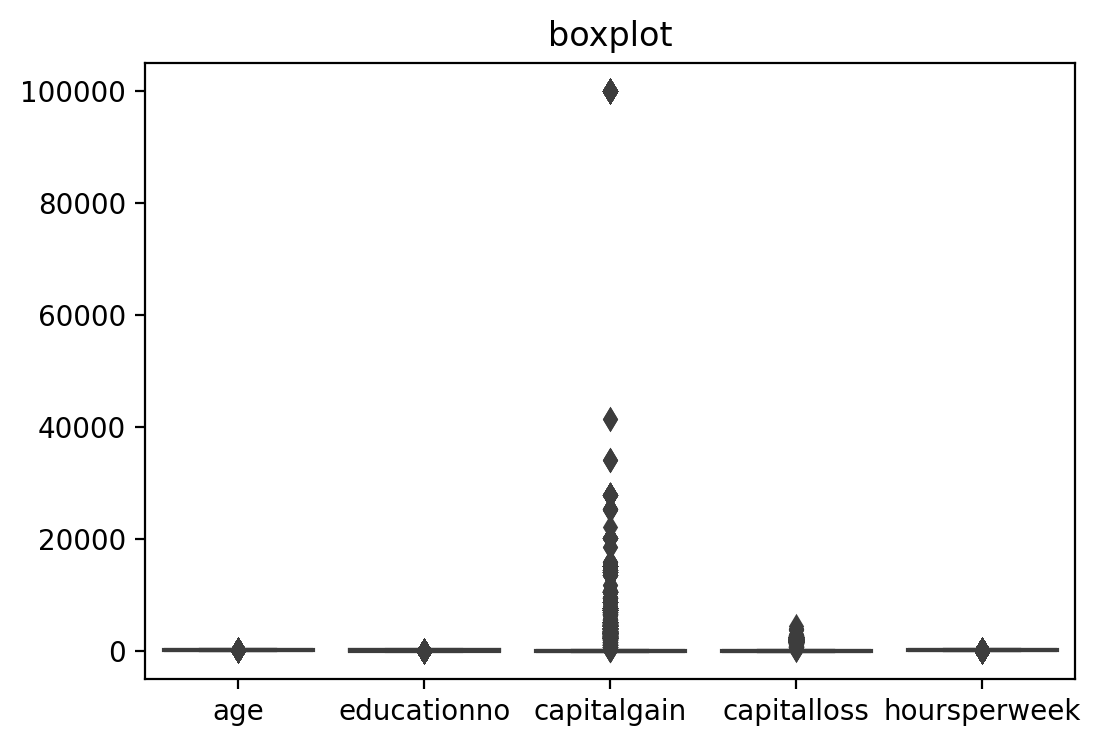

In [16]:
sns.boxplot(data = df)
plt.title('boxplot')

Text(0.5, 1.0, 'zoomed-in boxplot')

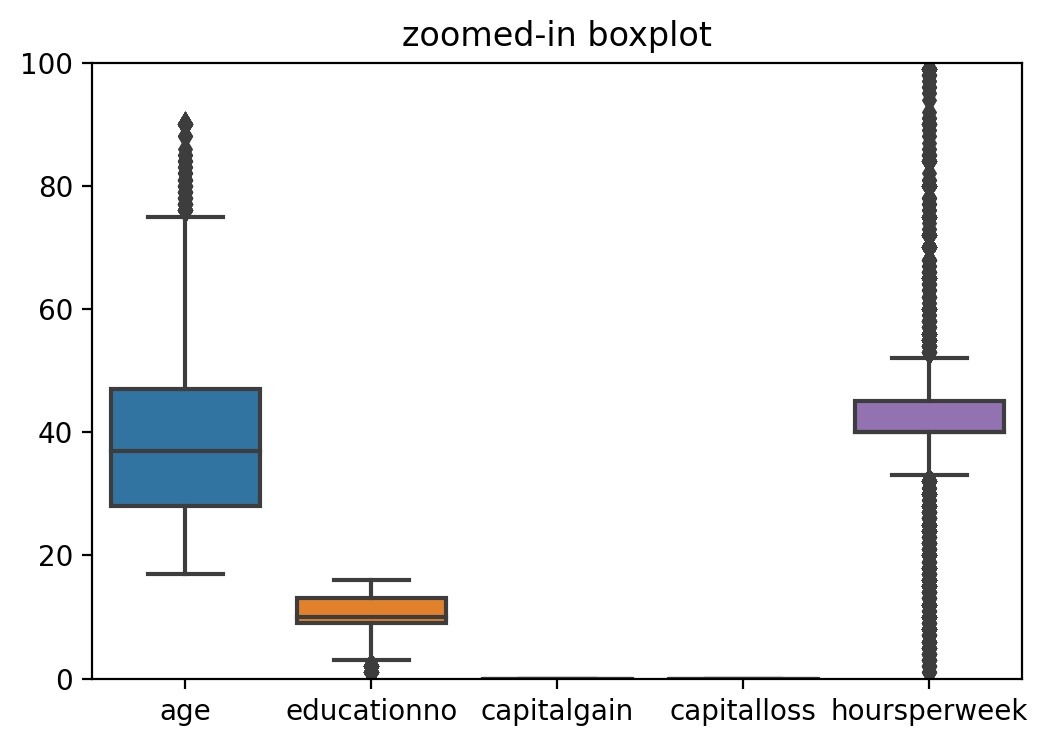

In [17]:
sns.boxplot(data = df)
plt.ylim(0,100)
plt.title('zoomed-in boxplot')

In [18]:
#Visualizations

In [19]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


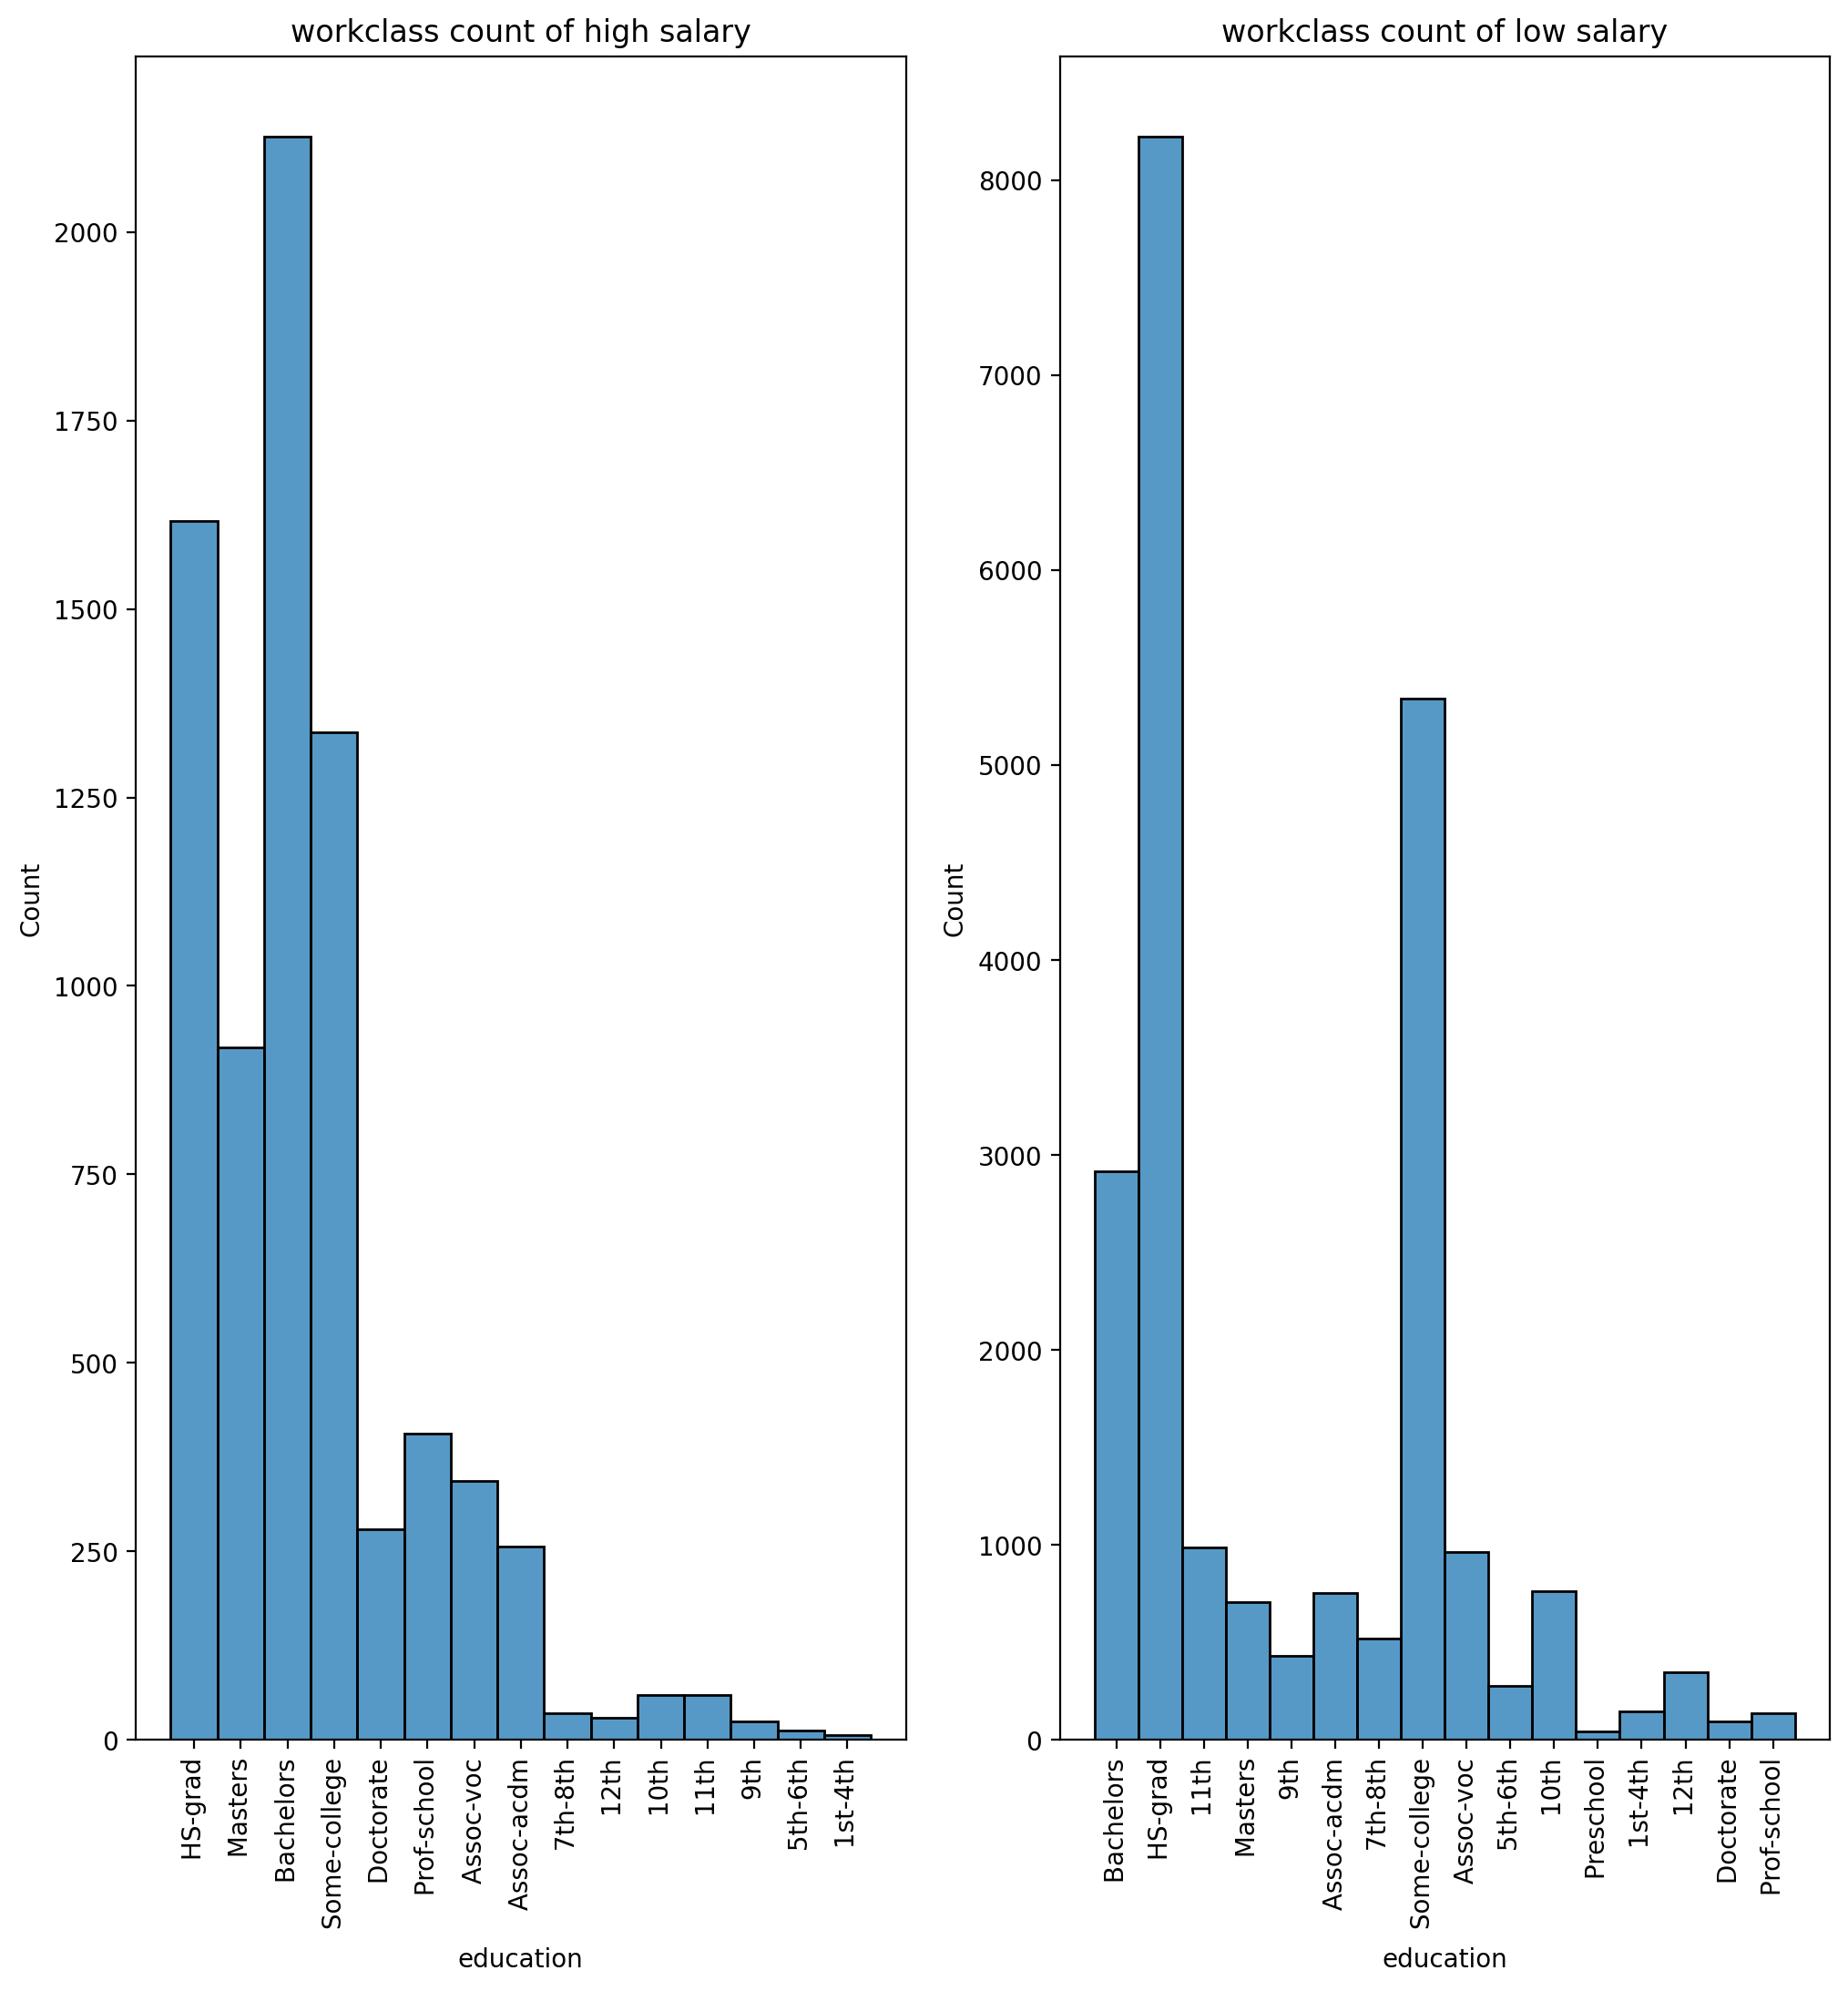

In [20]:
high_sal = df[df['Salary'] == ' >50K']
low_sal = df[df['Salary'] == ' <=50K']

plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('workclass count of high salary')

plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('workclass count of low salary')
plt.show()

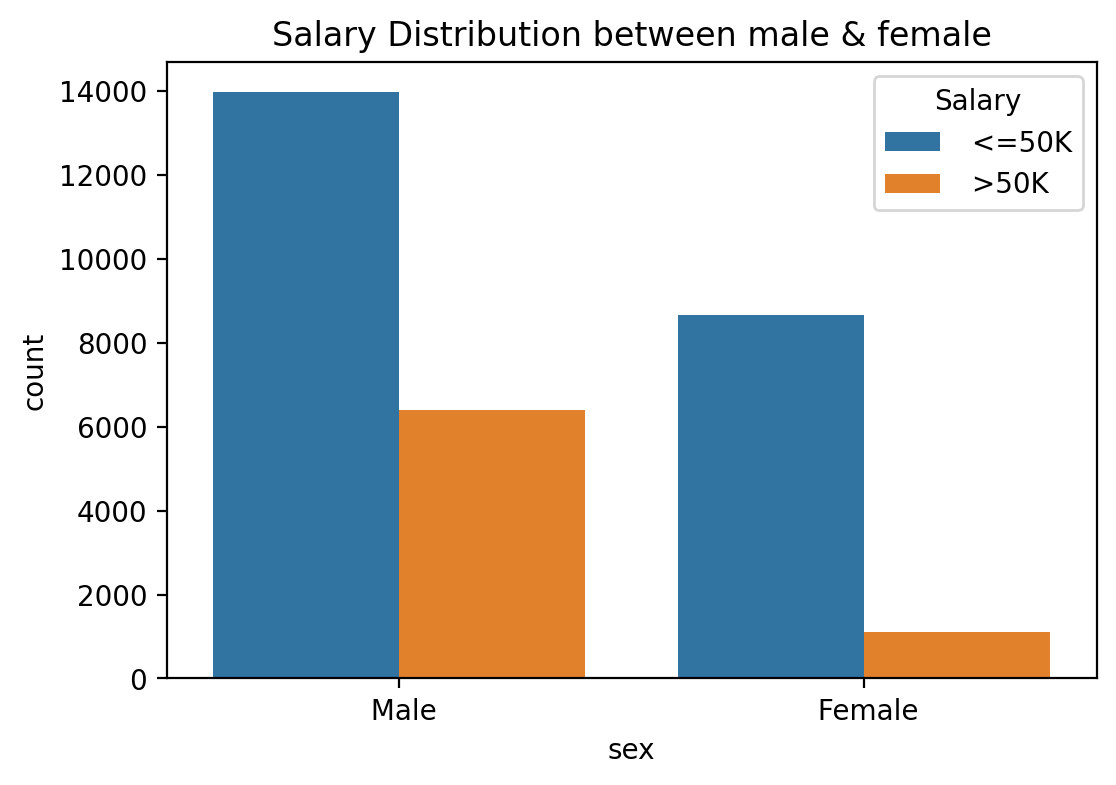

In [21]:
sns.countplot(data = df, x = 'sex', hue = 'Salary')
plt.title('Salary Distribution between male & female')
plt.show()


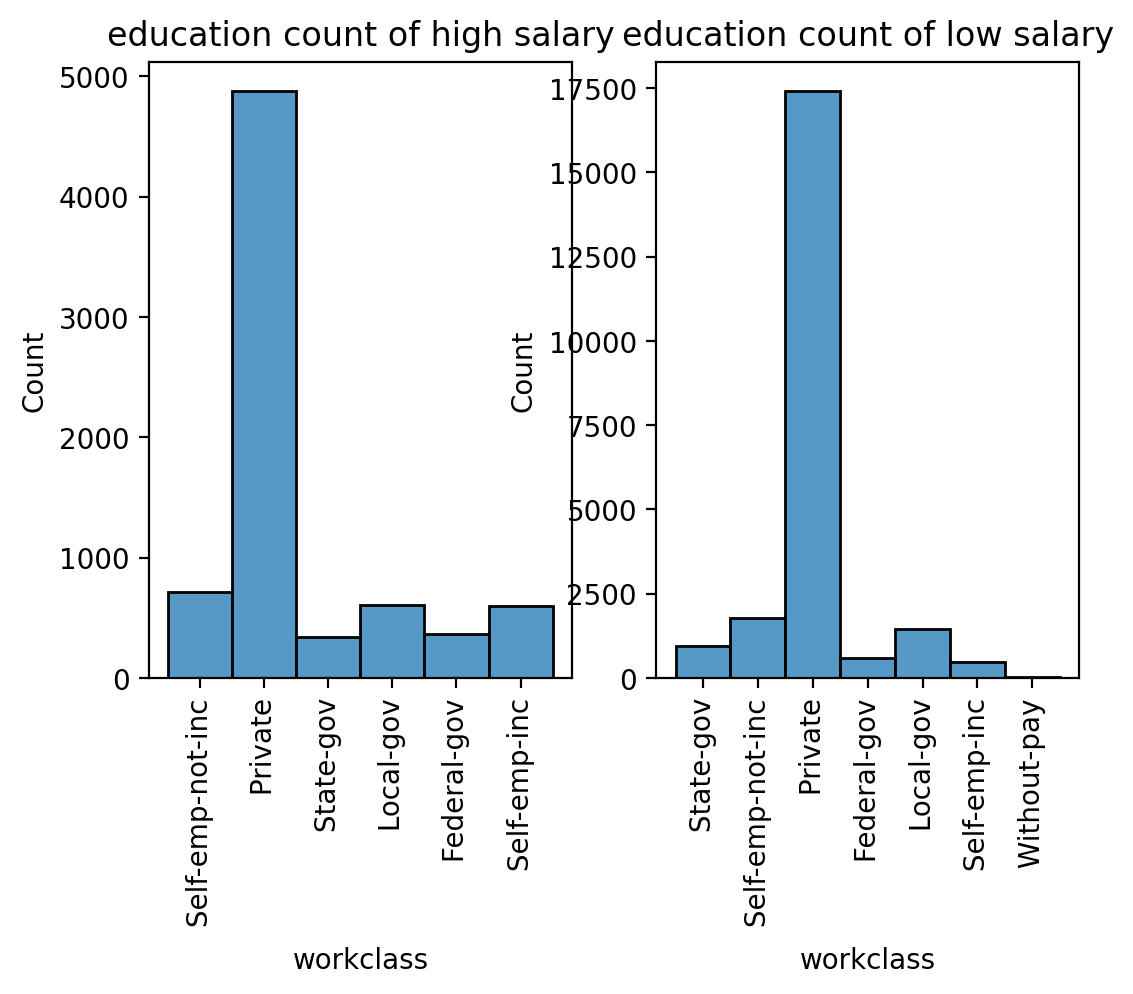

In [22]:
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('education count of high salary')
plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('education count of low salary')
plt.show()

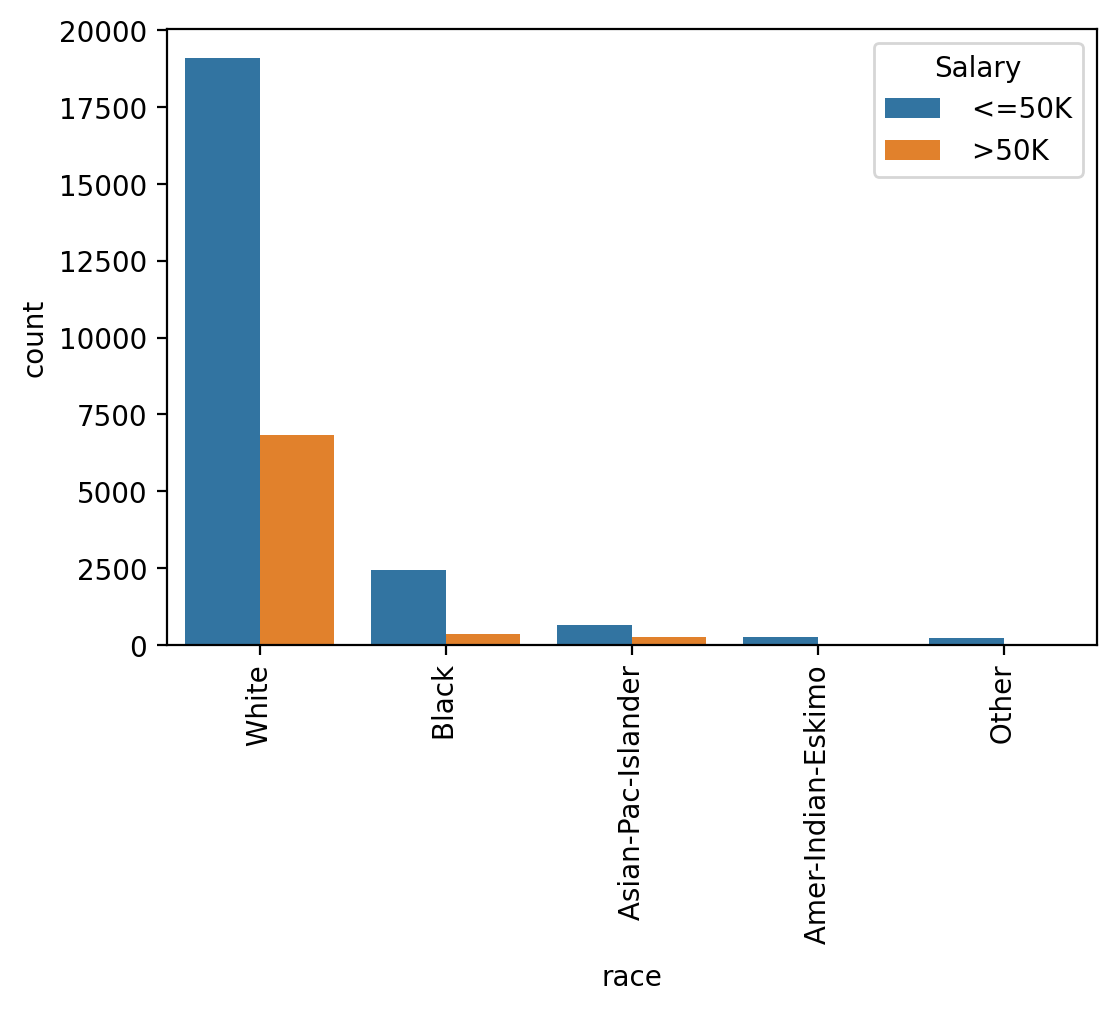

In [23]:
sns.countplot(data = df, x = 'race', hue = "Salary")
plt.xticks(rotation = 90)
plt.show()

In [24]:
#Label Encoding


from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains categorical data
        df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [25]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'age': [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
Unique values in 'workclass': [5 4 2 0 1 3 6]
Unique values in 'education': [ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]
Unique values in 'educationno': [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
Unique values in 'maritalstatus': [4 2 0 3 5 1 6]
Unique values in 'occupation': [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
Unique values in 'relationship': [1 0 5 3 4 2]
Unique values in 'race': [4 2 1 0 3]
Unique values in 'sex': [1 0]
Unique values in 'capitalgain': [ 2174     0 14084  5178  5013  2407 14344 15024  7688  4064  4386  7298
  1409  3674  1055  2050  2176   594 20051  6849  4101  8614  3411  2597
 25236  4650  2463  3103 10605  2964  3325  2580  3471  4865 99999  6514
  1471  2329  2105  2885 10520  2202  2961 27828  6767  22

<Axes: >

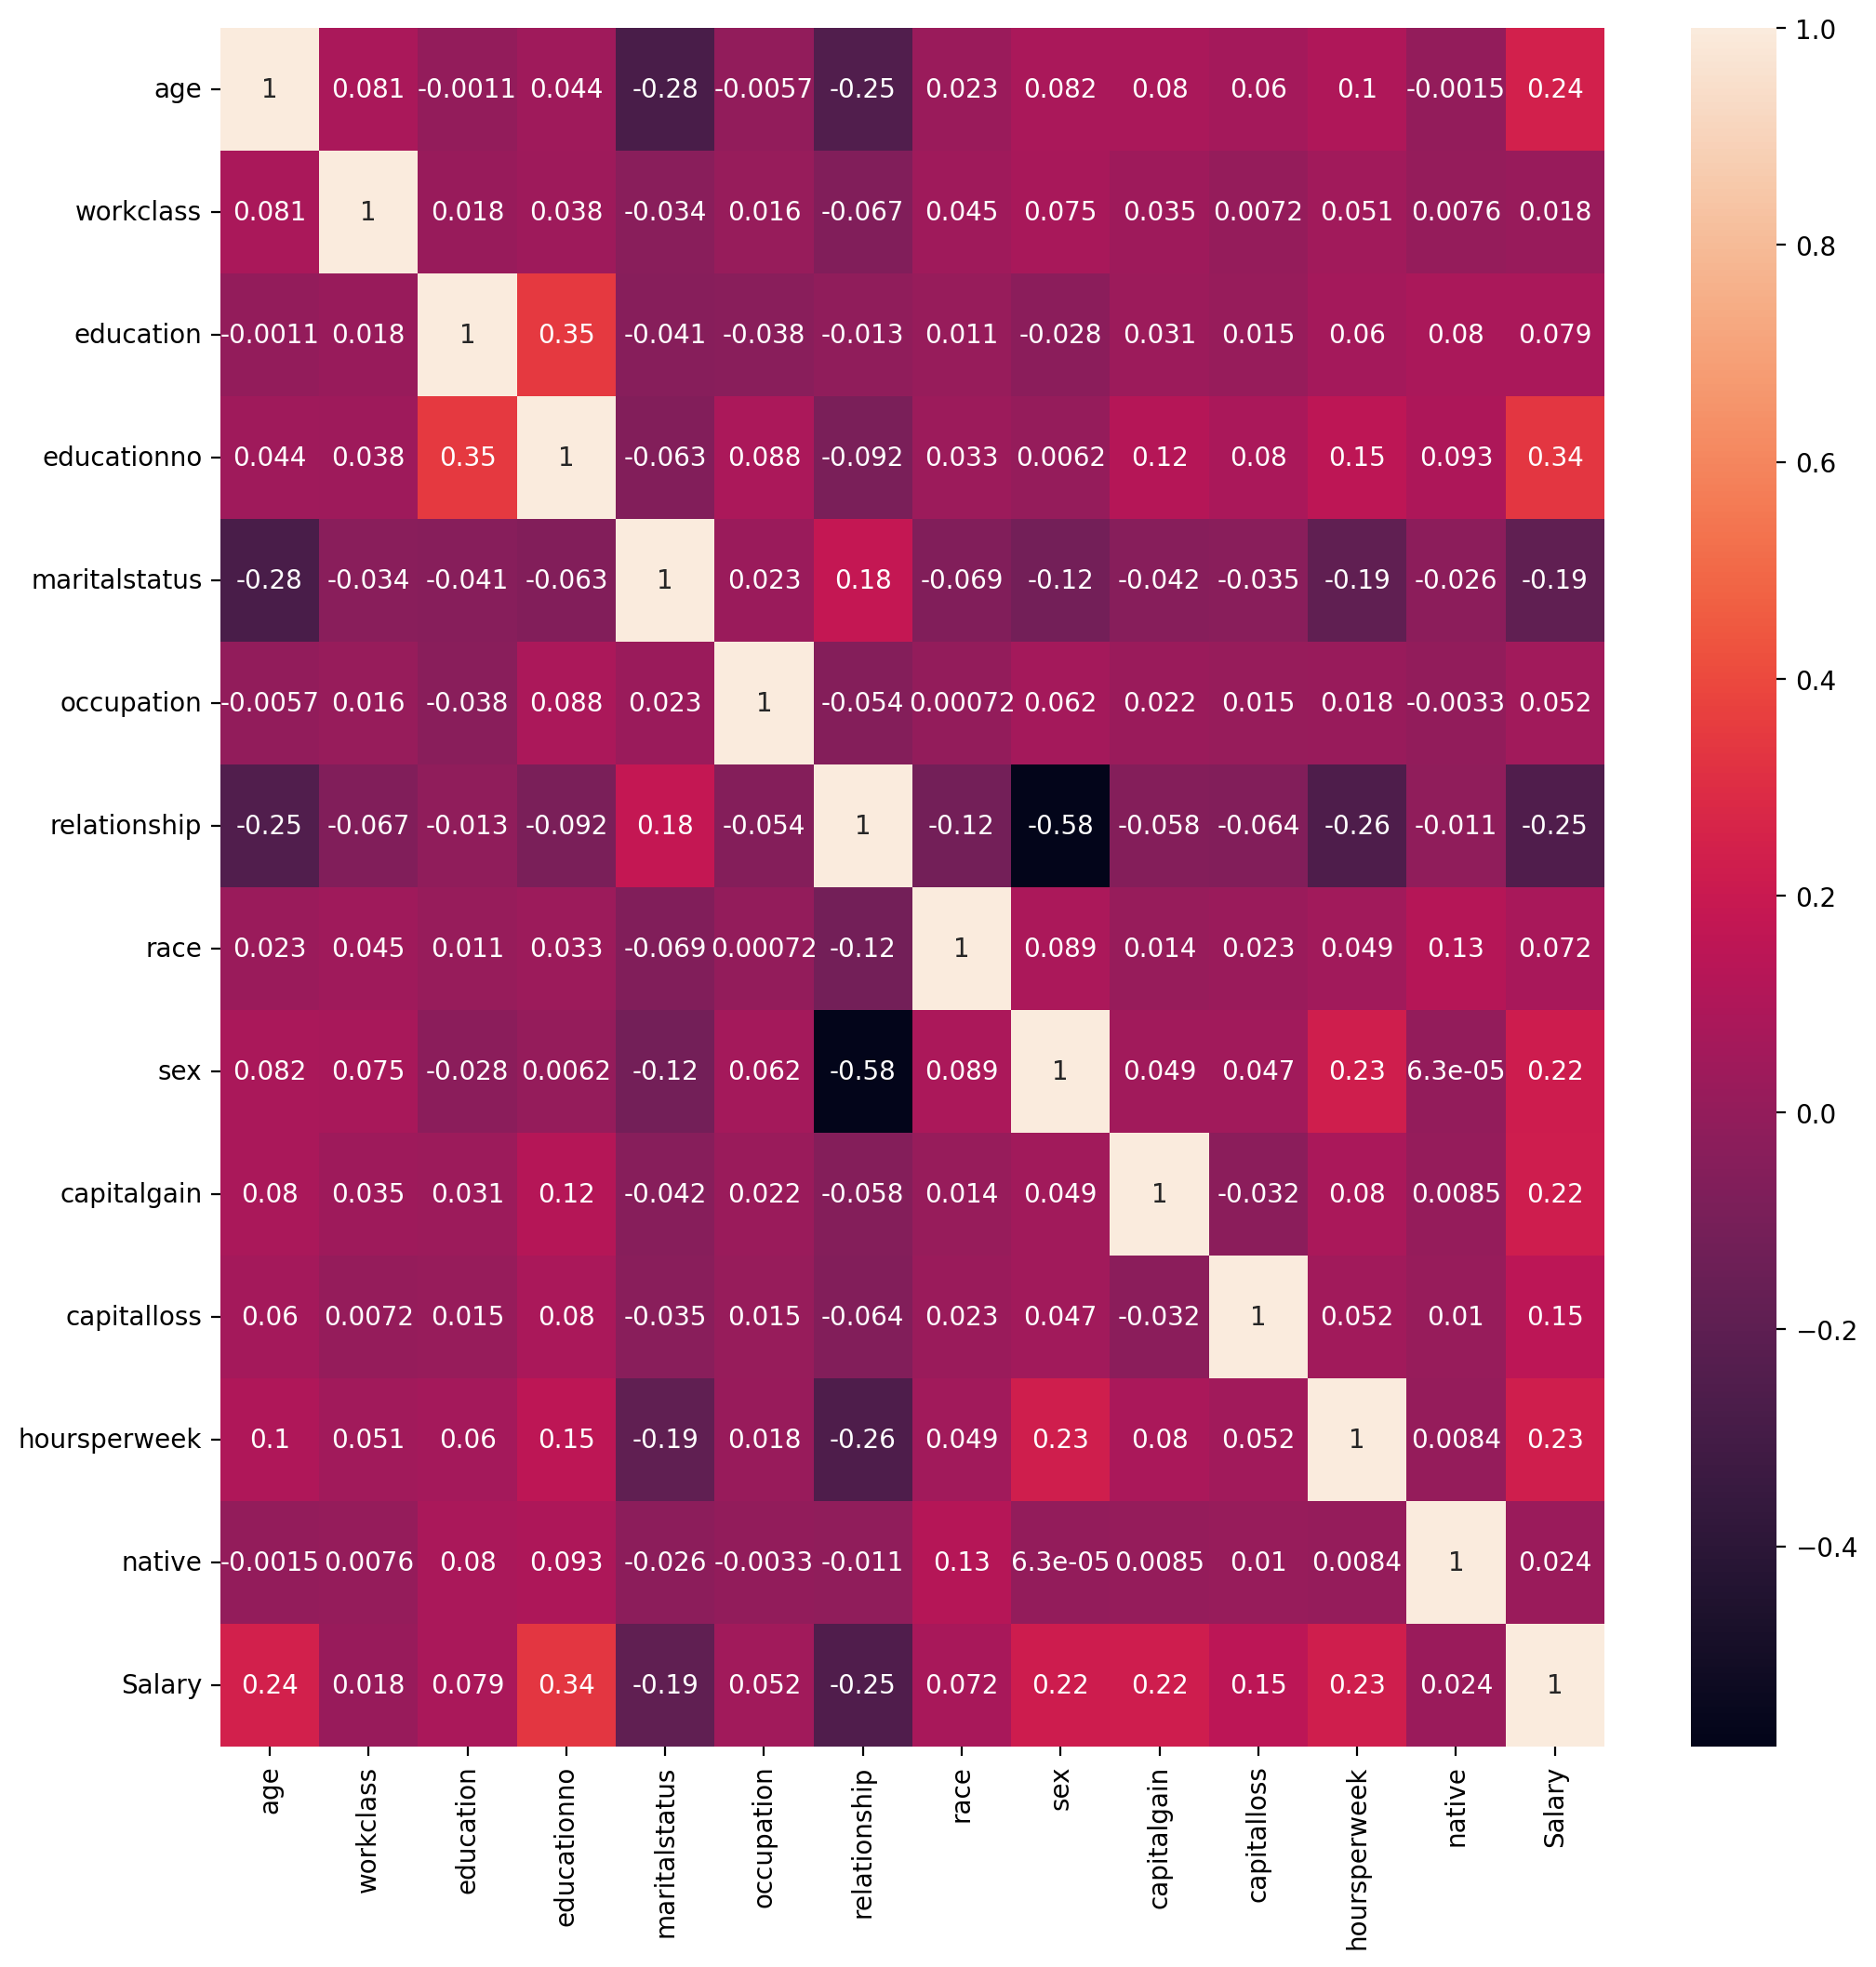

In [26]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot=True)

In [27]:
df.drop('capitalloss', inplace=True, axis = 1)
df.drop('capitalgain', inplace=True, axis = 1)

df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,40,37,0
1,50,4,9,13,2,3,0,4,1,13,37,0
2,38,2,11,9,0,5,1,4,1,40,37,0
3,53,2,1,7,2,5,0,2,1,40,37,0
4,28,2,9,13,2,9,5,2,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,40,37,1
30158,58,2,11,9,6,0,4,4,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,20,37,0


In [28]:
preprocessed_train_df = df
preprocessed_train_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,40,37,0
1,50,4,9,13,2,3,0,4,1,13,37,0
2,38,2,11,9,0,5,1,4,1,40,37,0
3,53,2,1,7,2,5,0,2,1,40,37,0
4,28,2,9,13,2,9,5,2,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,40,37,1
30158,58,2,11,9,6,0,4,4,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,20,37,0


In [29]:
# Store the DataFrame in the IPython database | used into another notebook
%store preprocessed_train_df

Stored 'preprocessed_train_df' (DataFrame)
